# MUML - Lab 9
**Mikołaj Spytek**

In [305]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## a)

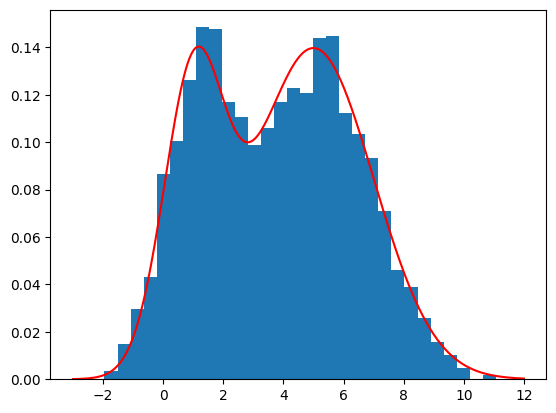

In [306]:
def generate_data(n):

    data = np.zeros((n,))
    distribution_indicator = np.random.binomial(1, 0.7, (n,))
    data[distribution_indicator == 1] = np.random.normal(
        5, 2, size=(np.sum(distribution_indicator))
    )
    data[distribution_indicator == 0] = np.random.normal(
        1, 1, size=(n - np.sum(distribution_indicator))
    )

    return data


def joint_pdf(x):
    return 0.3 * norm.pdf(x, loc=1, scale=1) + 0.7 * norm.pdf(x, loc=5, scale=2)


data = generate_data(2500)

plt.hist(data, bins=30, density=True)

x = np.linspace(-3, 12, 500)
y = joint_pdf(x)
plt.plot(x, y, c="red")
plt.show()

## b)

$$\sum_{i=1}^n \log p(x_i, G_i | \theta) = \sum_{i=1}^n \left( (1-g_i)(\log N(\mu_0, \sigma_0^2) + \log \pi_0) + g_i(\log N(\mu_1, \sigma_1^2) + \log \pi_1) \right)$$

## c)

$$\gamma_i = \frac{\pi_0 N(\mu_0, \sigma_0^2)}{\pi_0 N(\mu_0, \sigma_0^2) + \pi_1 N(\mu_1, \sigma_1^2) } $$

In [307]:
def ll(x, g, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    p = np.zeros_like(x)
    p[g == 1] = np.log(norm.pdf(x[g == 1], loc=mu_0, scale=sigma_0)) + np.log(pi_0)
    p[g == 0] = np.log(norm.pdf(x[g == 0], loc=mu_1, scale=sigma_1)) + np.log(pi_1)
    return np.sum(p)


def ll_emp(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    p = np.zeros_like(x)
    p += gamma * (np.log(norm.pdf(x, loc=mu_0, scale=np.sqrt(sigma_0))) + np.log(pi_0))
    p += (1 - gamma) * (
        np.log(norm.pdf(x, loc=mu_1, scale=np.sqrt(sigma_1))) + np.log(pi_1)
    )
    return np.sum(p)


def get_gamma(x, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    return (
        pi_1
        * norm.pdf(x, loc=mu_1, scale=np.sqrt(sigma_1))
        / (
            pi_0 * norm.pdf(x, loc=mu_0, scale=np.sqrt(sigma_0))
            + pi_1 * norm.pdf(x, loc=mu_1, scale=np.sqrt(sigma_1))
        )
    )

## d)

In [308]:
def get_gamma(x, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    return (
        pi_1
        * norm.pdf(x, loc=mu_1, scale=np.sqrt(sigma_1))
        / (
            pi_0 * norm.pdf(x, loc=mu_0, scale=np.sqrt(sigma_0))
            + pi_1 * norm.pdf(x, loc=mu_1, scale=np.sqrt(sigma_1))
        )
    )


def get_new_sigma0(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    return np.sum((1 - gamma) * (x - mu_0) ** 2) / np.sum(1 - gamma)


def get_new_sigma1(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    return np.sum((gamma) * (x - mu_1) ** 2) / np.sum(gamma)


def get_new_mu0(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    return np.sum((1 - gamma) * x) / np.sum(1 - gamma)


def get_new_mu1(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    return np.sum((gamma) * x) / np.sum(gamma)


def get_new_pi0(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    return np.mean(gamma)


def get_new_pi1(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1):
    return np.mean(1 - gamma)

## e)

In [309]:
x = generate_data(5000)

mu_0 = 1
mu_1 = -1
sigma_0 = 1
sigma_1 = 5
pi_0 = 0.1
pi_1 = 0.9

for i in range(1000):
    gamma = get_gamma(x, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1)
    # print(ll_emp(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1))
    # print(gamma[0])
    mu_0, mu_1, sigma_0, sigma_1, pi_0, pi_1 = (
        get_new_mu0(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1),
        get_new_mu1(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1),
        get_new_sigma0(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1),
        get_new_sigma1(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1),
        get_new_pi0(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1),
        get_new_pi1(x, gamma, pi_0, pi_1, mu_0, mu_1, sigma_0, sigma_1),
    )

In [310]:
mu_0, mu_1, sigma_0, sigma_1, pi_0, pi_1

(1.7691762558239053,
 5.759659145434062,
 2.1522023779624524,
 2.82840965278567,
 0.5106616084190346,
 0.4893383915809654)

## f)

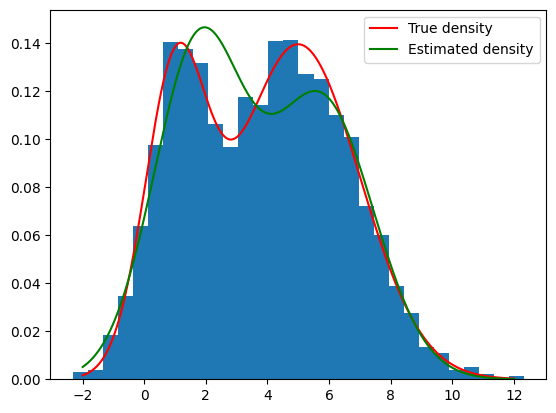

In [311]:
def estimated_density(x, mu_0, mu_1, sigma_0, sigma_1, pi_0, pi_1):
    return pi_0 * norm.pdf(x, loc=mu_0, scale=np.sqrt(sigma_0)) + pi_1 * norm.pdf(
        x, loc=mu_1, scale=np.sqrt(sigma_1)
    )


plt.hist(x, bins=30, density=True)
x_linspace = np.linspace(-2, 12, 500)
y_true = joint_pdf(x_linspace)
y_est = estimated_density(x_linspace, mu_0, mu_1, sigma_0, sigma_1, pi_0, pi_1)
plt.plot(x_linspace, y_true, color="red")
plt.plot(x_linspace, y_est, color="green")
plt.legend(["True density", "Estimated density"])
plt.show()

## g)

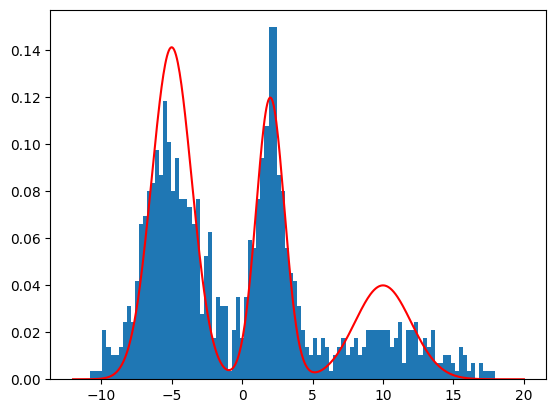

In [312]:
theta = np.array([-5, 2, 10]), np.array([2, 1, 4]), np.array([0.5, 0.3, 0.2])


def generate_data(n, theta, seed=123):
    rng = np.random.default_rng(123)
    mu, sigma, pi = theta
    assert (K := len(mu)) == len(sigma) == len(pi)

    data = np.zeros((n,))
    class_indicator = rng.choice(np.arange(K), p=pi, size=(n,))
    for i in range(K):
        data[class_indicator == i] = rng.normal(
            mu[i], sigma[i], size=(np.sum(class_indicator == i))
        )

    return data


def get_true_distribution(x, theta):
    mu, sigma, pi = theta
    assert (K := len(mu)) == len(sigma) == len(pi)

    dist = np.zeros_like(x)

    for i in range(K):
        dist += pi[i] * norm.pdf(x, loc=mu[i], scale=np.sqrt(sigma[i]))

    return dist


x = generate_data(1000, theta)
x_linspace = np.linspace(-12, 20, 500)
y_true = get_true_distribution(x_linspace, theta)

plt.hist(x, density=True, bins=100)
plt.plot(x_linspace, y_true, color="red")
plt.show()

In [313]:
def get_gammas(x, theta_hat):
    mu, sigma, pi = theta_hat
    assert (K := len(mu)) == len(sigma) == len(pi)

    gammas = np.zeros((x.shape[0], K))

    for i in range(K):
        gammas[:, i] = pi[i] * norm.pdf(x, loc=mu[i], scale=np.sqrt(sigma[i]))

    denominator = np.sum(gammas, axis=1)[:, None]

    return gammas / denominator


def get_mus(x, gammas, theta_hat):
    mu, sigma, pi = theta_hat
    assert (K := len(mu)) == len(sigma) == len(pi)

    mus = np.zeros_like(mu)

    for i in range(K):
        mus[i] = np.sum(gammas[:, i] * x) / np.sum(gammas[:, i])

    return mus


def get_sigmas(x, gammas, theta_hat):
    mu, sigma, pi = theta_hat
    assert (K := len(mu)) == len(sigma) == len(pi)

    sigmas = np.zeros_like(sigma)

    for i in range(K):
        sigmas[i] = np.sum(gammas[:, i] * (x - mu[i]) ** 2) / np.sum(gammas[:, i])

    return sigmas


def get_pis(x, gammas, theta_hat):
    mu, sigma, pi = theta_hat
    assert (K := len(mu)) == len(sigma) == len(pi)

    return np.mean(gammas, axis=0)

In [314]:
theta = np.array([-7, 2, 10]), np.array([2, 1, 3]), np.array([0.5, 0.3, 0.2])
x = generate_data(n=3000, theta=theta)

theta_hat = np.array([-3, 0, 7]), np.array([1, 1, 1]), np.array([0.3, 0.4, 0.3])

for i in range(200):
    gammas = get_gammas(x, theta_hat)

    theta_hat = (
        get_mus(x, gammas, theta_hat),
        get_sigmas(x, gammas, theta_hat),
        get_pis(x, gammas, theta_hat),
    )

(array([-6,  1,  8]), array([ 5,  1, 17]), array([0.51010063, 0.23092265, 0.25897672]))


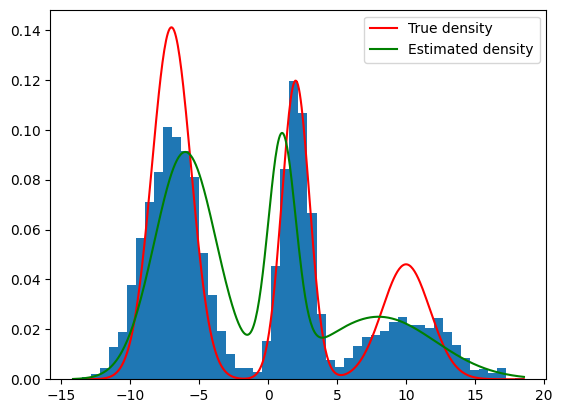

In [315]:
print(theta_hat)
plt.hist(x, bins=50, density=True)
x_linspace = np.linspace(min(x), max(x), 500)
y_true = get_true_distribution(x_linspace, theta)
y_est = get_true_distribution(x_linspace, theta_hat)
plt.plot(x_linspace, y_true, color="red")
plt.plot(x_linspace, y_est, color="green")
plt.legend(["True density", "Estimated density"])
plt.show()